In [1]:
#Importing all the libraries
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv(r'E:\Project\Diabetes Finder\diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

<AxesSubplot:>

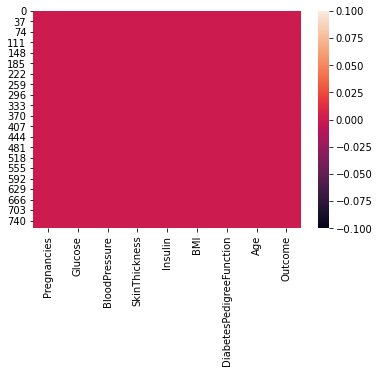

In [4]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Outcome', ylabel='count'>

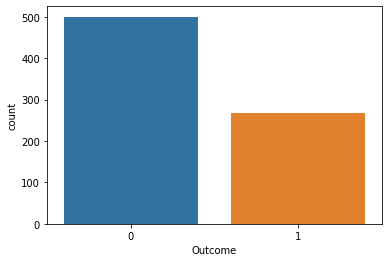

In [5]:
sns.countplot(x='Outcome',data=df)

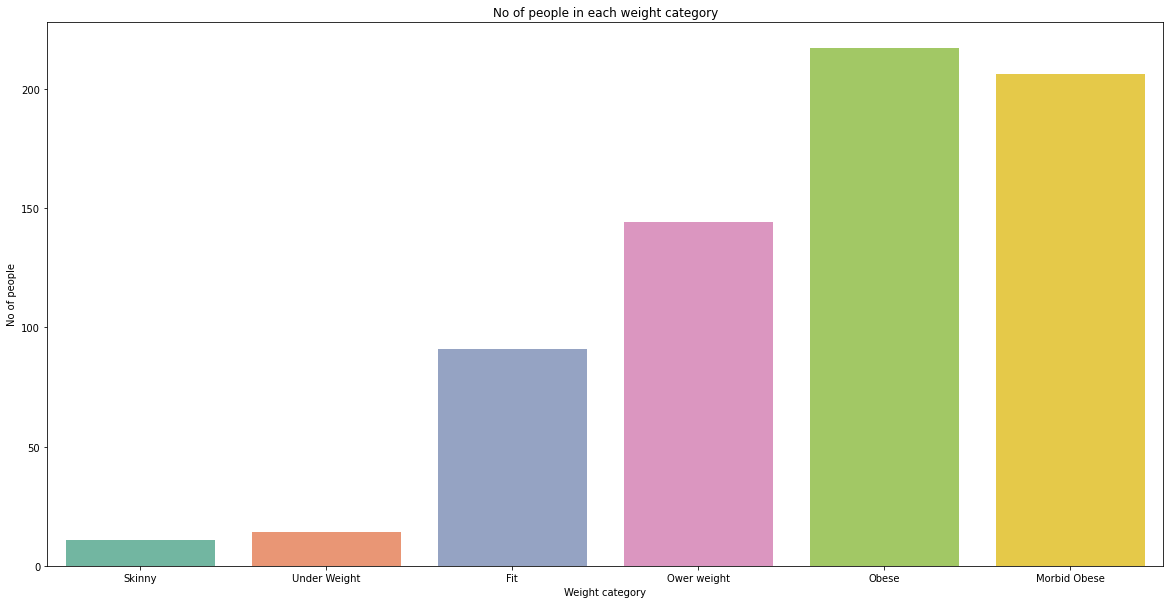

In [6]:
plt.figure(figsize=(20,10))
b0 =  df['BMI'][(df['BMI'] < 16)]
b1 =  df['BMI'][(df['BMI'] > 16) & (df["BMI"] <= 20)]
b2 =  df['BMI'][(df['BMI'] > 21) & (df["BMI"] <= 25)]
b3 =  df['BMI'][(df['BMI'] > 26) & (df["BMI"] <= 30)]
b4 =  df['BMI'][(df['BMI'] > 31) & (df["BMI"] <= 36)]
b5 =  df['BMI'][(df['BMI'] > 36)]
ssx = [ "Skinny", "Under Weight", "Fit","Ower weight","Obese","Morbid Obese"]
ssy = [len(b0.values), len(b1.values), len(b2.values), len(b3.values), len(b4.values), len(b5.values)]
plt.title ("No of people in each weight category")
sns.barplot(x=ssx, y=ssy, palette="Set2")

plt.xlabel("Weight category")
plt.ylabel("No of people")
plt.show()

<AxesSubplot:ylabel='Frequency'>

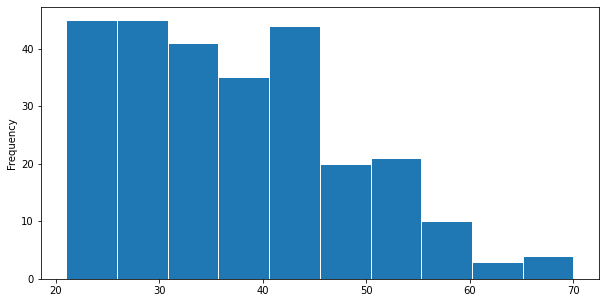

In [7]:
r1=df[df.Outcome==1]
r1['Age'].plot.hist(bins=10,figsize=(10,5),edgecolor='white')

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

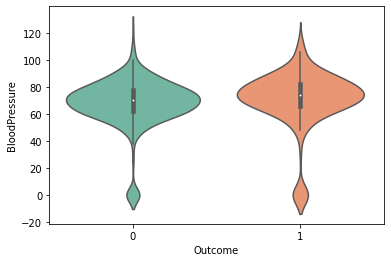

In [8]:
#Classifing the relation b/w blood pressure and diabetes
sns.violinplot(x='Outcome', y='BloodPressure', data=df, palette='Set2', split=True)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

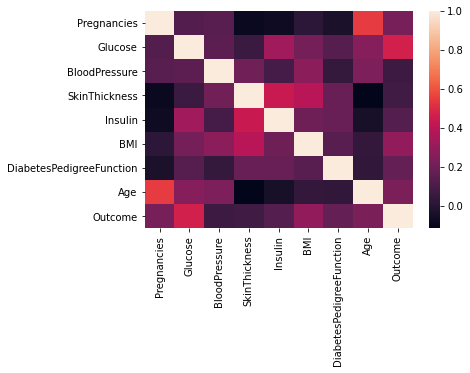

In [9]:
# Finding pairwise correlation
correlation=df.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)
print(correlation)

In [10]:
# TRAINING AND TESTING
# TRAINING - 650 
# TESTING - 100
# MAKING PREDICTIONS - Last 17

train=df[:650]
test=df[650:750]
check=df[750:]

trainlabel=np.asarray(train['Outcome'])
traindata=np.asarray(train.drop('Outcome',1))
testlabel=np.asarray(test['Outcome'])
testdata=np.asarray(test.drop('Outcome',1))

# Checking if the mean is 0 and standard deviation is 1
means=np.mean(traindata,axis=0)
stds=np.std(traindata,axis=0)
traindata=(traindata-means)/stds
testdata=(testdata-means)/stds

           # TRAINING 
    
Diabetes_Check=LogisticRegression(solver='lbfgs', max_iter=1000)
Diabetes_Check.fit(traindata,trainlabel)
accuracy=Diabetes_Check.score(testdata,testlabel)

print('Accuracy is ',accuracy*100,' Percent')






Accuracy is  78.0  Percent


C:\Users\MAHE\AppData\Local\Temp/ipykernel_17948/1650674151.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  traindata=np.asarray(train.drop('Outcome',1))
C:\Users\MAHE\AppData\Local\Temp/ipykernel_17948/1650674151.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  testdata=np.asarray(test.drop('Outcome',1))


In [11]:
         # TESTING

import joblib

In [12]:
joblib.dump([Diabetes_Check,means,stds],"diabetesmodel.pkl")

['diabetesmodel.pkl']

In [13]:
diabetesloadedmodel,means,stds = joblib.load('diabetesmodel.pkl')
accuracycheck=diabetesloadedmodel.score(testdata,testlabel)
print('The accuracy is',accuracycheck*100,'Percent')

The accuracy is 78.0 Percent


In [14]:
# Making Predctions with are final unused data

check.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0
752,3,108,62,24,0,26.0,0.223,25,0
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1


In [39]:
# Sample no 
Sample_data=check[1:2]


In [40]:
# Preparing the sample 

sampledata=np.asarray(Sample_data.drop('Outcome',1))
sampledata=(sampledata-means)/stds


#Prediction

prediction_probablity = diabetesloadedmodel.predict_proba(sampledata)
prediction = diabetesloadedmodel.predict(sampledata)
#print('The Probablity of having diabetes is ',prediction_probablity)
print("if Probablity is greater than 0.5 , outcome =1 ")
print("if Probablity is less than 0.5 then outcome =0")
print('Probablity = ',prediction_probablity,'(The second value is taken)')
if prediction.any()==1:
    print('You have diabetes')
    print('Consult Your Doctor Immediatly for severity and medication')
    print('Take Care as Diabetes if uncontrolled can be Fatal ')
else :
    print ('You dont have diabetes')
    print ('You are healthy')
    print ('To prevent diabetes click on the link below')
    print ('https://link.springer.com/content/pdf/10.1007/s11606-013-2548-4.pdf')





if Probablity is greater than 0.5 , outcome =1 
if Probablity is less than 0.5 then outcome =0
Probablity =  [[0.7224006 0.2775994]] (The second value is taken)
You dont have diabetes
You are healthy
To prevent diabetes click on the link below
https://link.springer.com/content/pdf/10.1007/s11606-013-2548-4.pdf


C:\Users\MAHE\AppData\Local\Temp/ipykernel_17948/4020169994.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  sampledata=np.asarray(Sample_data.drop('Outcome',1))
